# Example of confidence interval computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import zfit
from zfit.loss import UnbinnedNLL
from zfit.minimize import Minuit

from hepstats.hypotests.calculators import FrequentistCalculator, AsymptoticCalculator
from hepstats.hypotests import ConfidenceInterval
from hepstats.hypotests.parameters import POIarray

from utils import one_minus_cl_plot, pltdist, plotfitresult

/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/zfit-0.0.0-py3.7.egg/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
zfit.settings.set_seed(10)

### Fit of a Gaussian signal over an exponential background:

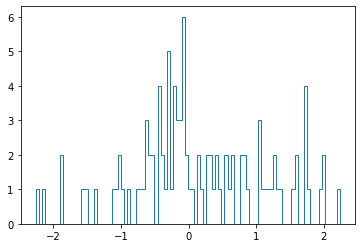

In [3]:
bounds = (-3, 3)

obs = zfit.Space('x', limits=bounds)

mean = zfit.Parameter("mean", 0.2, -5, 5)
sigma = zfit.Parameter("sigma", 1.0)
model = zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)

data = model.sample(100)
plt.hist(data.numpy(), bins=100, histtype='step');

In [4]:
# Create the negative log likelihood
nll = UnbinnedNLL(model=model, data=data) 

In [5]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [6]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)
minimum.hesse();
print(minimum)

------------------------------------------------------------------
| FCN = 138.9                   |      Ncalls=29 (29 total)      |
| EDM = 4.68E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[mean, sigma] dtype=float64>0] data=[<zfit.core.data.SampleData object at 0x7f96580f8710>] constraints=[]> 
with
<Minuit strategy=PushbackStrat

Text(0, 0.5, 'number of events')

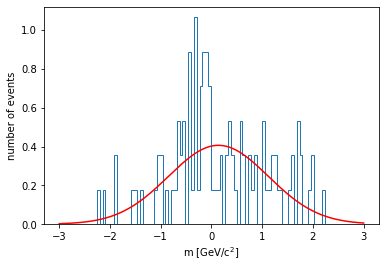

In [7]:
nbins = 80
plt.hist(data.numpy(), bins=nbins, histtype='step', density=True);
plotfitresult(model, bounds, nbins)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")

### Confidence interval

We want to compute the confidence interval of the mean of the Gaussian at 68% confidence level.

In [8]:
# Create the negative log likelihood

# instantation of the calculator
#calculator = FrequentistCalculator(nll, minimizer, ntoysnull=200)
calculator = FrequentistCalculator.from_yaml("FD_toys.yml", nll, minimizer, ntoysnull=200)
#calculator = AsymptoticCalculator(nll, minimizer)
calculator.bestfit = minimum #optionnal

In [9]:
# parameter of interest of the null hypothesis
poinull = POIarray(mean, np.linspace(-0.5, 0.5, 50))

In [10]:
from scipy.stats import norm

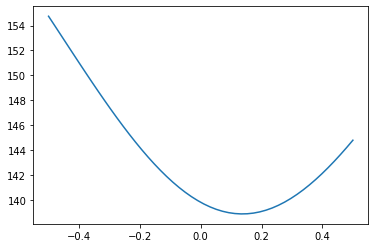

In [11]:
plt.plot(poinull.values, calculator.obs_nll(poinull))

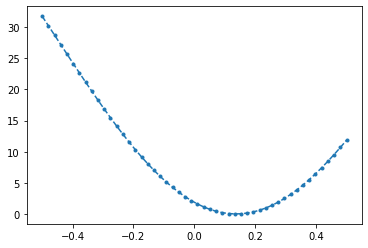

In [12]:
plt.plot(poinull.values, calculator.qobs(poinull, onesided=False), ".--")

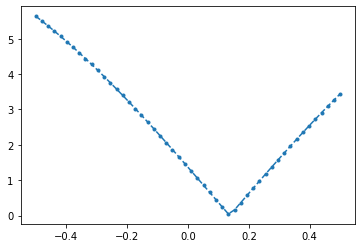

In [13]:
plt.plot(poinull.values, calculator.qobs(poinull, onesided=False)**0.5, ".--")

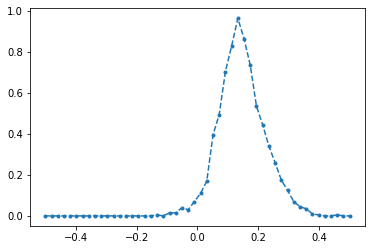

In [14]:
plt.plot(poinull.values, calculator.pvalue(poinull, onesided=False)[0], ".--")

In [15]:
# instantation of the discovery test
ci = ConfidenceInterval(calculator, poinull, qtilde=False)

In [16]:
ci.interval();


Confidence interval on mean:
	0.04383557993671548 < mean < 0.23923047453083604 at 68.0% C.L.


Text(0.5, 0, 'mean')

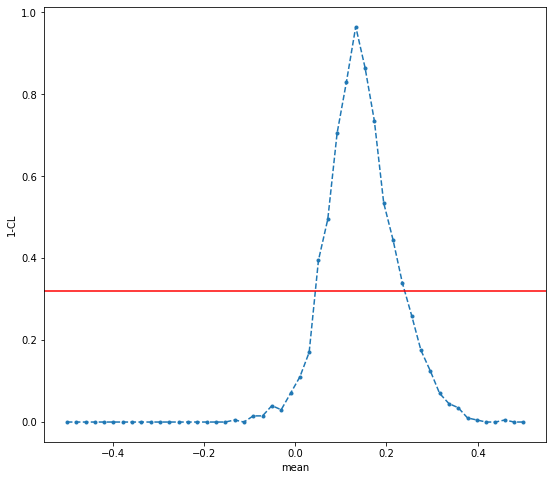

In [17]:
f = plt.figure(figsize=(9, 8))
one_minus_cl_plot(poinull.values, ci.pvalues())
plt.xlabel("mean")

In [18]:
calculator.to_yaml("FD_toys.yml")

In [26]:
poinull[25]

POI('mean', value=0.010204081632653073)

In [ ]:
bins = 40
bounds = (0, 0.7)

plt.hist(calculator.qnull(poinull, None)[poinull[25]], bins=bins, range=bounds, histtype="step", label="qtilde = False", log=True)
plt.hist(calculator.qnull(poinull, None, qtilde=True)[poinull[25]], bins=bins, range=bounds, histtype="step", label="qtilde = False", log=True)
plt.legend()

Generating null hypothesis toys for POI('mean', value=-0.5).
0 toys generated, fitted and scanned!
40 toys generated, fitted and scanned!
80 toys generated, fitted and scanned!
120 toys generated, fitted and scanned!
160 toys generated, fitted and scanned!
Generating null hypothesis toys for POI('mean', value=-0.47959183673469385).
0 toys generated, fitted and scanned!
40 toys generated, fitted and scanned!
80 toys generated, fitted and scanned!
120 toys generated, fitted and scanned!
160 toys generated, fitted and scanned!
Generating null hypothesis toys for POI('mean', value=-0.45918367346938777).
0 toys generated, fitted and scanned!
40 toys generated, fitted and scanned!
80 toys generated, fitted and scanned!
120 toys generated, fitted and scanned!
160 toys generated, fitted and scanned!
Generating null hypothesis toys for POI('mean', value=-0.4387755102040816).
0 toys generated, fitted and scanned!
40 toys generated, fitted and scanned!
80 toys generated, fitted and scanned!
120 t